In [5]:
# Imports for this program.
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [6]:
# Load training data and reshape it.
training_data = np.genfromtxt('trainingdata.csv', delimiter=',', dtype=int)
X_train = np.reshape(training_data[:, :256], (1, 1024, 256))
y_train = training_data[:, 256:]

# Convert numpy array into torch tensor.
tensor_x = torch.Tensor(X_train)
tensor_y = torch.Tensor(y_train)

In [7]:
# Load testing data and reshape it.
testing_data = np.genfromtxt('testingdata.csv', delimiter=',', dtype=int)
X_test = np.reshape(testing_data[:, :256], (1, 256, 256))
y_test = testing_data[:, 256:]

# Convert numpy array into torch tensor
testing_tensor_x = torch.Tensor(X_test)
testing_tensor_y = torch.Tensor(y_test)

In [8]:
# Autoencoder definition using Pytorch. 
class Autoencoder_One(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=40, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.tconv1 = nn.ConvTranspose2d(40, 1, 2, stride=2)  

    def encoder(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        return(x)

    def decoder(self, x):
        x = F.relu(self.tconv1(x))
        x = torch.tanh(x)
        return x

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [9]:
autoencoder = Autoencoder_One()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=1e-3)

In [10]:
num_epochs = 3
outputs = []
for epoch in range(num_epochs):
    for i in range(tensor_x.shape[1]):
        image = tensor_x[:,i,:].reshape(1, 16, 16)
        output = autoencoder(image)
        loss = criterion(output, image)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        outputs.append((epoch, image, output))

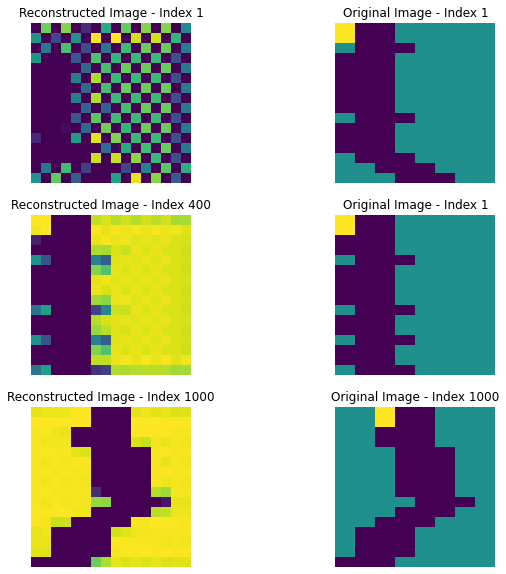

In [11]:
# Display images from the first epoch.
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(3, 2, 1)
plt.imshow(outputs[1][2].detach().numpy().reshape(16, 16))
plt.title("Reconstructed Image - Index 1")
plt.axis('off')

fig.add_subplot(3, 2, 2)
plt.imshow(outputs[1][1].detach().numpy().reshape(16, 16))
plt.title("Original Image - Index 1")
plt.axis('off')



fig.add_subplot(3, 2, 3)
plt.imshow(outputs[400][2].detach().numpy().reshape(16, 16))
plt.title("Reconstructed Image - Index 400")
plt.axis('off')


fig.add_subplot(3, 2, 4)
plt.imshow(outputs[400][1].detach().numpy().reshape(16, 16))
plt.title("Original Image - Index 1")
plt.axis('off')

fig.add_subplot(3, 2, 5)
plt.imshow(outputs[1000][2].detach().numpy().reshape(16, 16))
plt.title("Reconstructed Image - Index 1000")
plt.axis('off')

fig.add_subplot(3, 2, 6)
plt.imshow(outputs[1000][1].detach().numpy().reshape(16, 16))
plt.title("Original Image - Index 1000")
plt.axis('off')


plt.show()

In [12]:
# Set the network to evaluation mode
autoencoder.eval()

testing_outputs = []
# No longer training, calculating the gradients for outputs is no longer required.
with torch.no_grad():
    for i in range(testing_tensor_x.shape[1]):

        # Get input and label.
        input = tensor_x[:,i,:].reshape(1,16,16).float()

        # Calculate outputs by running images through the network.
        output = autoencoder(input)
        testing_outputs.append((epoch, image, output))

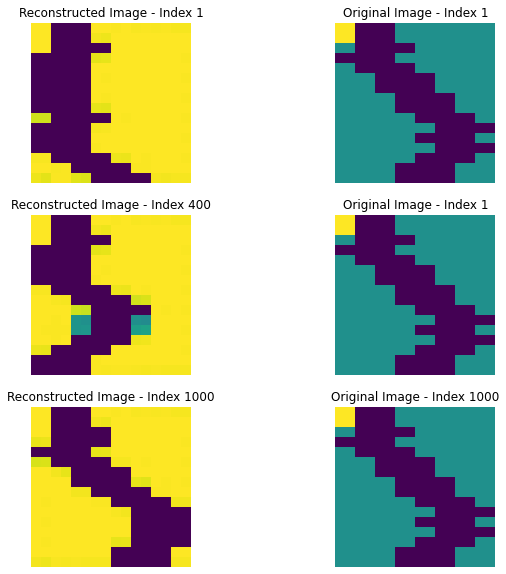

In [13]:
# Display images from first epoch
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(3, 2, 1)
plt.imshow(testing_outputs[1][2].detach().numpy().reshape(16, 16))
plt.title("Reconstructed Image - Index 1")
plt.axis('off')

fig.add_subplot(3, 2, 2)
plt.imshow(testing_outputs[1][1].detach().numpy().reshape(16, 16))
plt.title("Original Image - Index 1")
plt.axis('off')



fig.add_subplot(3, 2, 3)
plt.imshow(testing_outputs[50][2].detach().numpy().reshape(16, 16))
plt.title("Reconstructed Image - Index 400")
plt.axis('off')


fig.add_subplot(3, 2, 4)
plt.imshow(testing_outputs[50][1].detach().numpy().reshape(16, 16))
plt.title("Original Image - Index 1")
plt.axis('off')

fig.add_subplot(3, 2, 5)
plt.imshow(testing_outputs[100][2].detach().numpy().reshape(16, 16))
plt.title("Reconstructed Image - Index 1000")
plt.axis('off')

fig.add_subplot(3, 2, 6)
plt.imshow(testing_outputs[100][1].detach().numpy().reshape(16, 16))
plt.title("Original Image - Index 1000")
plt.axis('off')


plt.show()